Drzewa decyzyjne

In [70]:
# Import biblioteki PANDAS 
import pandas as pd
# Import biblioteki WARNINGS
# Umożliwia ona zarządzaniem ostrzeżeniami w Python
import warnings
warnings.filterwarnings('ignore')

In [75]:
# Wczytanie danych
zbior_danych = pd.read_csv('/home/jovyan/notebooks/projekt_data_mining/dane_filtered_final.csv')
zbior_danych = zbior_danych.drop(columns=['first_name', 'last_name', 'email', 'state', 'street_address', 'postal_code'])

In [76]:
#liczba wierszy i liczba kolumn
zbior_danych.shape

(14320, 9)

In [78]:
# Import biblioteki do podziału zbioru
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Podział zbioru data_GCD na zbiór uczący i testowy
target = 'is_returned_or_cancelled'
X = data_GCD.drop(columns=target)
y = data_GCD[target]

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Apply One-Hot Encoding to categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Transform the data
X = preprocessor.fit_transform(X)
one_hot_encoder = preprocessor.named_transformers_['cat']
encoded_feature_names = one_hot_encoder.get_feature_names_out(categorical_cols)
feature_names = numerical_cols.tolist() + encoded_feature_names.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [79]:
X_dense = X.toarray()  # Konwersja do gęstej macierzy
X_df = pd.DataFrame(X_dense, columns=feature_names)

# Wyświetlenie pierwszych kilku wierszy DataFrame
print(X_df.head())

   user_id   age  avg_num_of_item  avg_total_sales  gender_F  gender_M  \
0      1.0  60.0              3.0            37.94       1.0       0.0   
1      8.0  62.0              1.0            22.50       1.0       0.0   
2     18.0  30.0              1.0            26.00       1.0       0.0   
3     20.0  35.0              1.0            15.00       0.0       1.0   
4     28.0  69.0              4.0            30.95       1.0       0.0   

   city_Aalst  city_Abbeville  city_Abingdon  city_Acaraú  ...  \
0         0.0             0.0            0.0          0.0  ...   
1         0.0             0.0            0.0          0.0  ...   
2         0.0             0.0            0.0          0.0  ...   
3         0.0             0.0            0.0          0.0  ...   
4         0.0             0.0            0.0          0.0  ...   

   country_Poland  country_South Korea  country_Spain  country_United Kingdom  \
0             0.0                  0.0            0.0                     1.0

POJEDYNCZE DRZEWA

In [80]:
# Import bibliotek do implementacji drzew
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [81]:
# Utworzenie obiektu drzewa decyzyjnego:
drzewo1 = DecisionTreeClassifier(random_state=1)

In [82]:
# Konstrukcja drzewa, dopasowanie do danych uczących
drzewo1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [83]:
# Predykcja na zbiorze uczącycm
y_pred_train = drzewo1.predict(X_train)

In [84]:
# Ocena dokładności predykcji na zbiorze uczącycm
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Dokładność klasyfikacji na zbiorze uczącycm: ", accuracy_train)

Dokładność klasyfikacji na zbiorze uczącycm:  1.0


In [85]:
# Predykcja na zbiorze testowym
y_pred_test = drzewo1.predict(X_test)

In [86]:
# Ocena dokładności predykcji na zbiorze testowym
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Dokładność klasyfikacji na zbiorze testowym: ", accuracy_test)

Dokładność klasyfikacji na zbiorze testowym:  0.6295391061452514


Wykres drzewa

In [87]:
# Instalacja biblioteki graphviz:
!pip install graphviz

In [88]:
# Import bibliotek
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

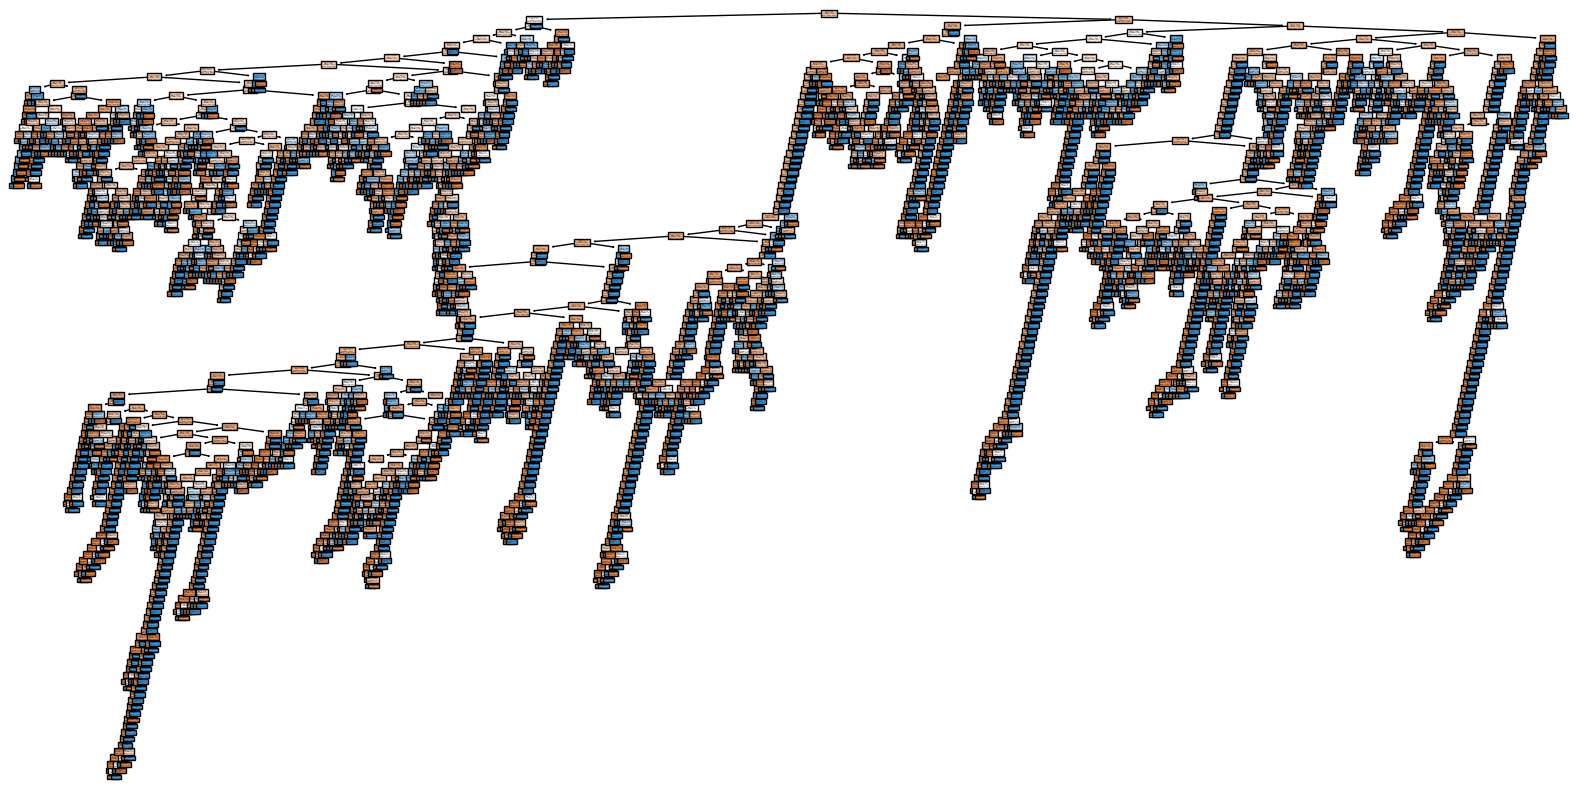

In [89]:
plt.figure(figsize=(20,10))
plot_tree(drzewo1, filled=True)
plt.show()

Przycinanie drzewa

In [90]:
# Przycinanie drzewa z wykorzystaniem DecisionTreeClassifier.
# Parametr ccp_alpha służy do przycinania drzewa poprzez kontrolowanie wielkości kosztu złożoności drzewa. 
# Im większa wartość parametru ccp_alpha, tym większe przycięcie drzewa.
# Iteracyjnie tworzone są drzewa dla różnych wartości ccp_alpha i dodawane są do listy drzew. 

# Utworzenie ścieżki przycinania (cost complexity pruning path) dla drzewa decyzyjnego, 
# którego obiekt został utworzony wcześniej i jest przechowywany w zmiennej "drzewo1".
path1 = drzewo1.cost_complexity_pruning_path(X_train, y_train)
#  Wartości statystyki cost complexity criterion dla ścieżki drzewa zostaną przypisane do zmiennej "ccp_alphas_"
ccp_alphas_ = path1.ccp_alphas
# Utworzenie pustej listy o nazwie drzewa_
drzewa_ = []
# Pętla for, dla każdej wartości ccp_alpha1 z listy ccp_alphas_  utworzy nowe drzewo decyzyjne
# z wartością hiperparametru ccp_alpha równą ccp_alpha1
# random_state=42 ustawia ziarno na wartość 42
for ccp_alpha1 in ccp_alphas_:
    drzewo1_ = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha1)
    drzewo1_.fit(X_train, y_train)
    drzewa_.append(drzewo1_)

In [91]:
# ccp_alphas_[:-1] i drzewa_[:-1] są używane do usunięcia ostatniego elementu z list ccp_alphas_ i drzewa_. 
# Ostatni element w liście ccp_alphas odpowiada największej wartości ccp_alphas.
ccp_alphas = ccp_alphas_[:-1]
print (ccp_alphas)

[0.00000000e+00 5.62538796e-05 5.65309923e-05 5.66208667e-05
 5.72550610e-05 5.78648907e-05 5.81936685e-05 5.81936685e-05
 6.54678771e-05 6.54678771e-05 6.54678771e-05 6.98324022e-05
 7.27420857e-05 7.27420857e-05 7.48204310e-05 7.48204310e-05
 7.63791899e-05 7.63791899e-05 7.63791899e-05 7.85614525e-05
 7.98084597e-05 8.00162942e-05 8.00162942e-05 8.00162942e-05
 8.05758487e-05 8.08346427e-05 8.09134926e-05 8.09206553e-05
 8.10554669e-05 8.14711359e-05 8.14711359e-05 8.19461863e-05
 8.21557673e-05 8.24410304e-05 8.24410304e-05 8.24410304e-05
 8.28140668e-05 8.28520027e-05 8.29259777e-05 8.29259777e-05
 8.30324295e-05 8.31338122e-05 8.32560678e-05 8.32617104e-05
 8.32924645e-05 8.33227527e-05 8.34952635e-05 8.34952635e-05
 8.34952635e-05 8.34952635e-05 8.38895741e-05 8.39331758e-05
 8.39331758e-05 8.39331758e-05 8.41505566e-05 8.41729848e-05
 8.41729848e-05 8.42454853e-05 8.42804855e-05 8.43808194e-05
 8.45193757e-05 8.45411956e-05 8.45626746e-05 8.45626746e-05
 8.45626746e-05 8.476034

In [92]:
# drzewa[:-1] przypisuje do obiektu drzewa listę drzew bez ostatniego drzewa
drzewa = drzewa_[:-1]

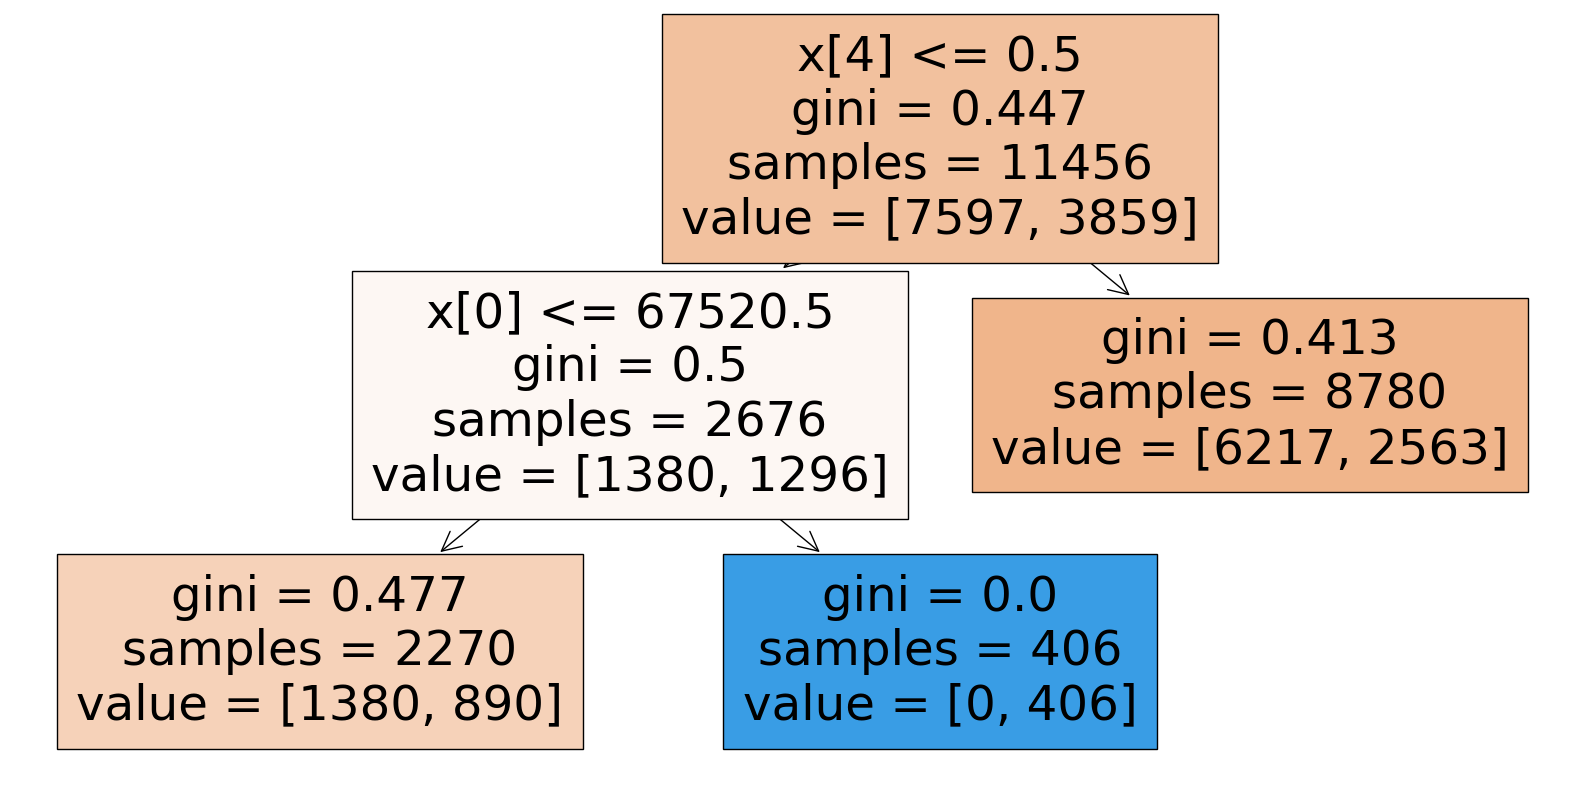

In [93]:
# Generowanie wykresu maksymalnie przyciętego drzewa
# drzewa[-1] oznacza ostatnie drzewo z listy drzewa
plt.figure(figsize=(20,10))
plot_tree(drzewa[-1], filled=True)
plt.show()

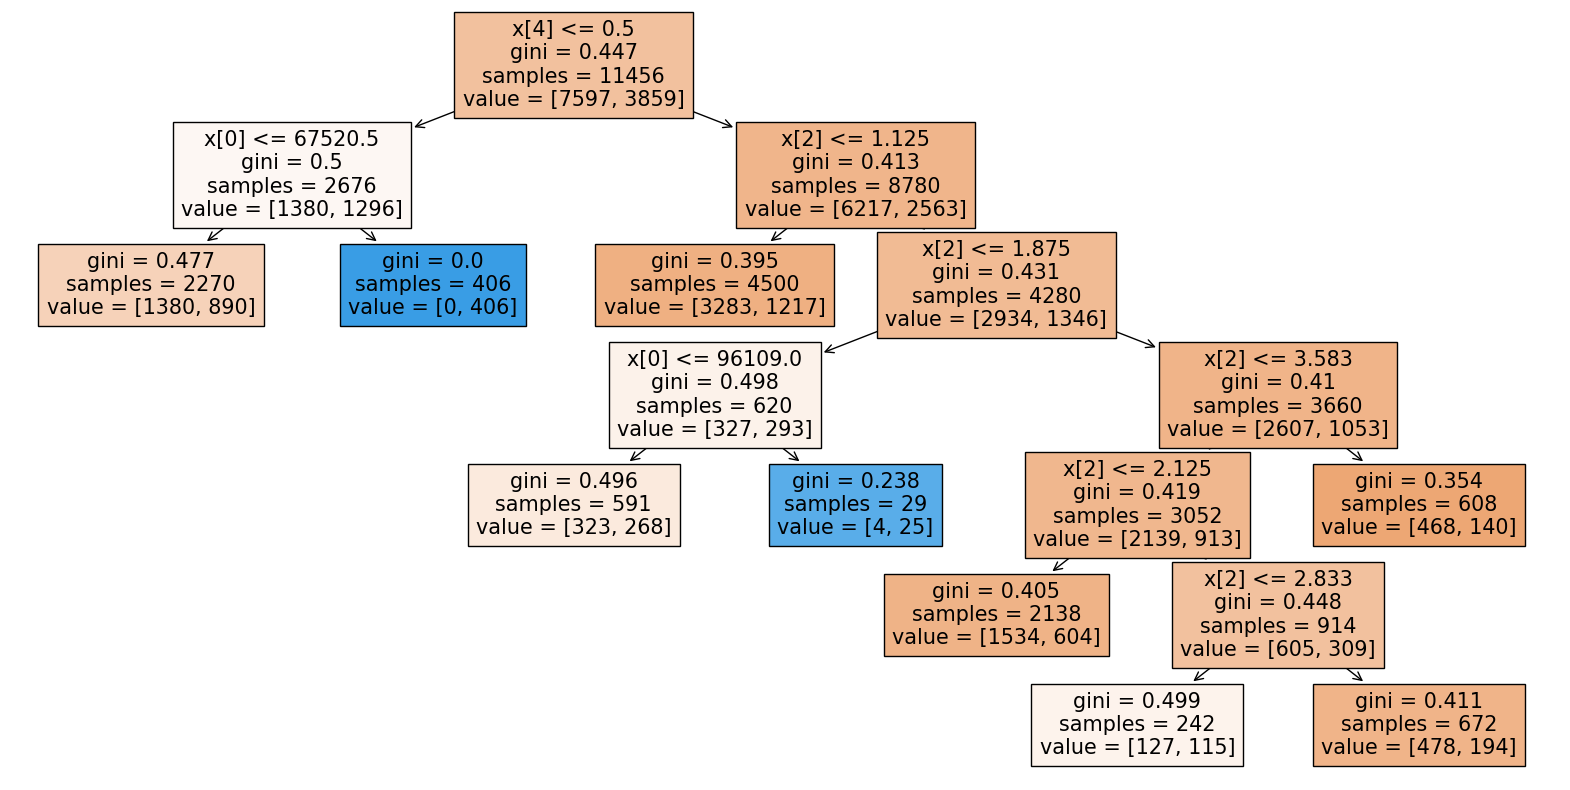

In [94]:
# Generowanie wykresu nieco głępszegi drzewa
# drzewa[-4] oznacza czwarte od końca drzewo z listy drzewa
plt.figure(figsize=(20,10))
plot_tree(drzewa[-4], filled=True)
plt.show()

In [120]:
# Predykcja na zbiorze testowym dla przyciętego drzewo decyzyjnego o największym ccp_alpha
drzewo2 = drzewa[-10]
y_pred = drzewo2.predict(X_test)
accuracy = drzewo2.score(X_test, y_test)
print("Dokładność predykcji dla drzewa decyzyjnego: {:.2f}%".format(accuracy*100))

Dokładność predykcji dla drzewa decyzyjnego: 69.45%


In [122]:
# Predykcja na zbiorze testowym dla głębszego drzewa: drzewa[-4]
drzewo3 = drzewa[-10]
y_pred = drzewo3.predict(X_test)
accuracy = drzewo3.score(X_test, y_test)
print("Dokładność predykcji dla drzewa decyzyjnego: {:.2f}%".format(accuracy*100))

Dokładność predykcji dla drzewa decyzyjnego: 69.45%


In [123]:
# Wyznaczenie najlepszej wartości dla parametru ccp_alpha

from sklearn.model_selection import GridSearchCV

# Korzystamy z modelu drzewo1
#drzewo1 = DecisionTreeClassifier(random_state=1)

# Podanie zakres wartości ccp_alpha do przetestowania
param_grid = {"ccp_alpha": [0.0001, 0.001, 0.01, 0.1, 1]}

# Obiekt GridSearchCV testuje pięć różnych wartości ccp_alpha za pomocą 5-krotnej walidacji krzyżowej, 
# i wybiera optymalną wartość ccp_alpha.

# Definicja obiektu GridSearchCV i dopasowanie modelu
grid_search = GridSearchCV(drzewo1, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Wybór najlepszej wartości ccp_alpha
best_ccp_alpha = grid_search.best_params_["ccp_alpha"]

print ("Najlepsza wartość ccp_alpha: {:.2f}".format(best_ccp_alpha)) 

Najlepsza wartość ccp_alpha: 0.00


In [98]:
# Konstrukcja modelu dla wybranej wartości ccp_alpha
drzewo4 = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01)
drzewo4.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)

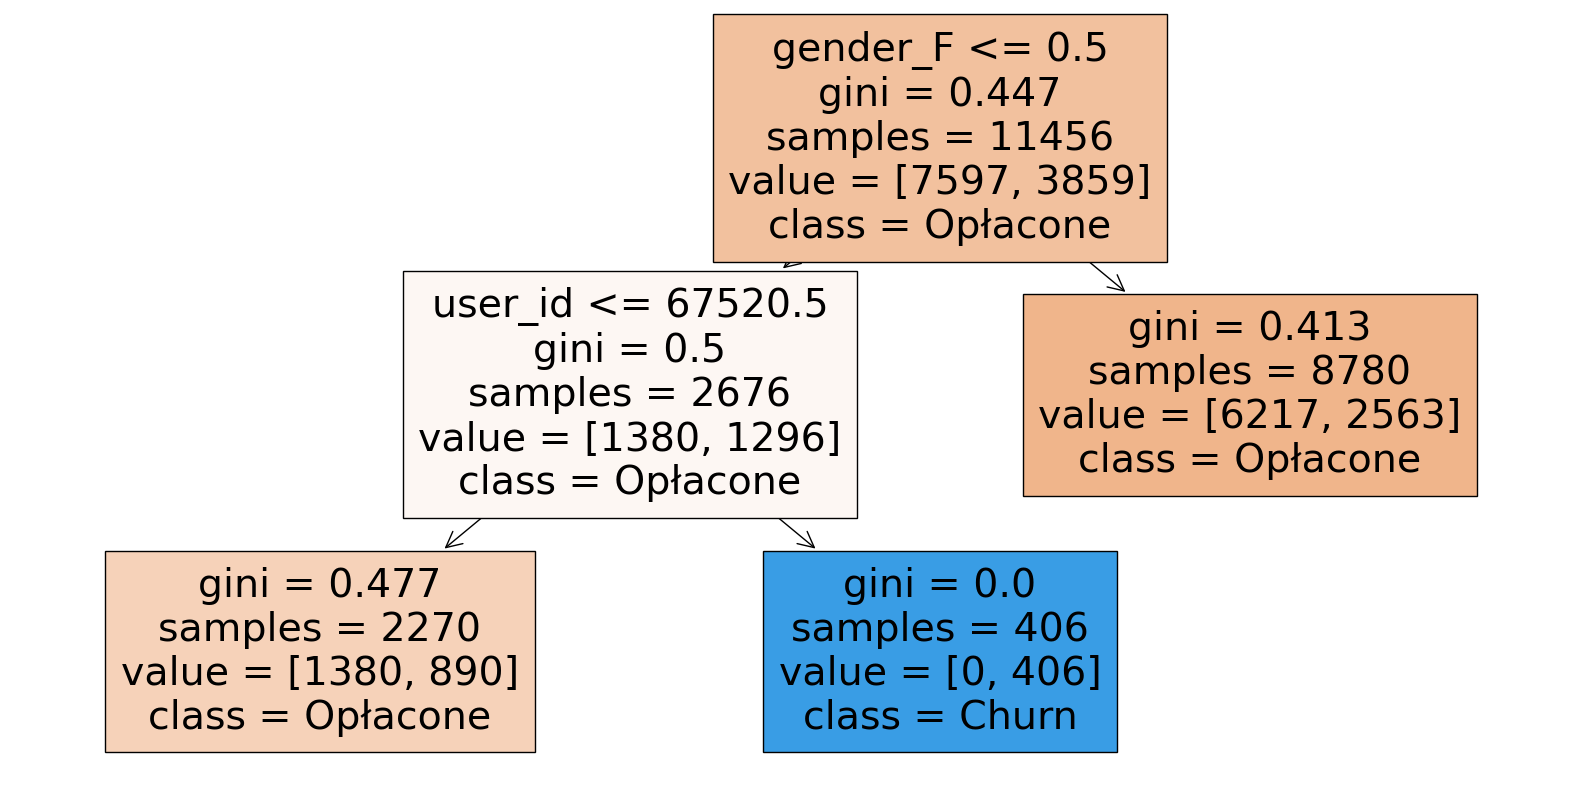

In [99]:
#Wykres otrzymanego drzewa wraz z nazwami zmiennych
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=feature_names, class_names=['Opłacone', 'Churn'])
plt.show()

In [100]:
# OCENA JAKOŚCI OTRZYMANEGO MODELU drzewo4

# Predykcja na zbiorze uczącycm
y_pred_train_ = drzewo4.predict(X_train)

In [101]:
# Dokładność klasyfikacji na zbiorze uczącym
accuracy_train_ = accuracy_score(y_train, y_pred_train_ )

# Wyświetlenie wyników
print("Dokładność klasyfikacji na zbiorze uczącym: {:.2f}%".format(accuracy_train_*100))

Dokładność klasyfikacji na zbiorze uczącym: 69.86%


In [102]:
# Predykcja na zbiorze testowym
y_pred_test_ = drzewo4.predict(X_test)

In [103]:
# Dokładność klasyfikacji na zbiorze testowym
accuracy_test_ = accuracy_score(y_test, y_pred_test_ )

# Wyświetlenie wyników
print("Dokładność klasyfikacji na zbiorze testowym: {:.2f}%".format(accuracy_test_*100))

Dokładność klasyfikacji na zbiorze testowym: 70.11%


In [104]:
# Import biblioteki - macierzy pomyłek
from sklearn.metrics import confusion_matrix

# Wyznaczenie macierzy pomyłek
conf_matrix = confusion_matrix(y_test, y_pred_test_)

# Wydruk macierzy pomyłek
print("Macierz pomyłek:")
print(conf_matrix)

Macierz pomyłek:
[[1904    0]
 [ 856  104]]


In [105]:
# Import biblioteki - odsetek błędnych klasyfikacji
from sklearn.metrics import accuracy_score

# Obliczenie odsetka błędnych klasyfikacji
error_rate = 1 - accuracy_score(y_test, y_pred_test_)

# Wyświetlenie odsetek błędnych klasyfikacji
print("Odsetek błędnych klasyfikacji: {:.2f}%".format(error_rate*100))

Odsetek błędnych klasyfikacji: 29.89%


In [106]:
# Import biblioteki - krzywa ROC
from sklearn.metrics import roc_curve

y_pred_t_proba = drzewo4.predict_proba(X_test)
# Wydruk pierszych 3 wierszy 
y_pred_t_proba [0:3]


array([[0.70808656, 0.29191344],
       [0.70808656, 0.29191344],
       [0.70808656, 0.29191344]])

In [107]:
# Obliczenie wartości TPR i FPR oraz progów decyzyjnych (cut-off point, threshold)
#"y_pred_t_proba[:, 1]" oznacza drugą kolumnę przewidywanych prawdopodobieństw (predykcja 1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_t_proba[:, 1])

# Wyświetlenie wartości TPR i FPR dla każdego progu decyzyjnego
for i, threshold in enumerate(thresholds):
    print("Threshold {:.2f}, FPR: {:.2f}, TPR: {:.2f}".format(threshold, fpr[i], tpr[i]))

Threshold inf, FPR: 0.00, TPR: 0.00
Threshold 1.00, FPR: 0.00, TPR: 0.11
Threshold 0.39, FPR: 0.17, TPR: 0.30
Threshold 0.29, FPR: 1.00, TPR: 1.00


In [108]:
# Import biblioteki - pole pod krzywą ROC
from sklearn.metrics import roc_auc_score

# Wyznaczenie pola pod krzywą ROC
roc_auc = roc_auc_score(y_test, y_pred_t_proba[:, 1])
# Wyświetlenie pola pod krzywą ROC
print("Pole pod krzywą ROC: {:.2f}".format(roc_auc))

Pole pod krzywą ROC: 0.58


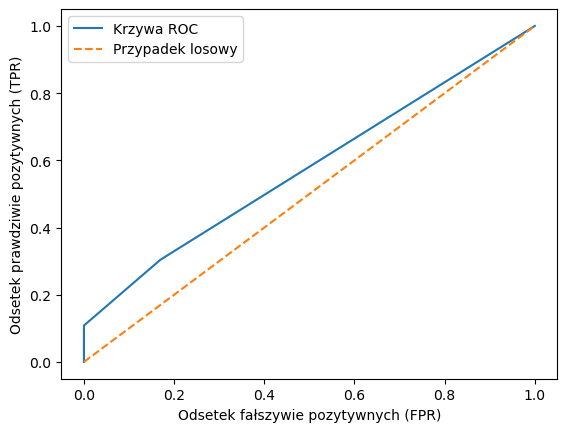

In [109]:
# Import biblioteki - wykres krzywej ROC
import matplotlib.pyplot as plt

# Wykres krzywej ROC
plt.plot(fpr, tpr, label='Krzywa ROC')
plt.plot([0, 1], [0, 1], linestyle='--', label='Przypadek losowy')
# Opis osi
plt.xlabel('Odsetek fałszywie pozytywnych (FPR)')
plt.ylabel('Odsetek prawdziwie pozytywnych (TPR)')
# Legenda
plt.legend()
# Wyświetlenie wykresu
plt.show()

In [110]:
# DODANIE WYNIKU PREDYKCJI DO DANYCH
# Utworzenie kopii ramki danych dla zbioru uczącego
import numpy as np
X_copy=X_train.copy()
X_train_dense = X_train.toarray()  # Konwersja do gęstej macierzy
wynik_train = pd.DataFrame(X_train_dense, columns=feature_names)

# Dodanie kolumny z prawdziwymi etykietami
wynik_train['y_true'] = y_train  

# Dodanie kolumny z predykcją do ramki danych
wynik_train['y_pred'] = y_pred_train_

# Nagłówek ramki danych
wynik_train.head(5)

,user_id,age,avg_num_of_item,avg_total_sales,gender_F,gender_M,city_Aalst,city_Abbeville,city_Abingdon,city_Acaraú,...,country_Spain,country_United Kingdom,country_United States,traffic_source_Display,traffic_source_Email,traffic_source_Facebook,traffic_source_Organic,traffic_source_Search,y_true,y_pred
0,29755.0,56.0,3.0,14.47,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,7857.0,67.0,1.0,25.00,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0
2,851.0,25.0,2.0,24.25,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,97441.0,15.0,2.0,20.85,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,6962.0,64.0,1.0,21.42,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,0


Sterowanie wyglądem drzewa

In [111]:
# Zdefiniowanie modelu dla wybranych dowolnie parametrów
drzewo5 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)

In [112]:
# Uczenie drzewa, dopasowanie do danych uczących
drzewo5.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)

In [113]:
print(drzewo5)
from sklearn.tree import export_text
tree_text = export_text(tree, feature_names=feature_names)

# Wyświetl tekstową reprezentację drzewa
print(tree_text)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)
|--- gender_F <= 0.50
|   |--- user_id <= 67520.50
|   |   |--- class: 0
|   |--- user_id >  67520.50
|   |   |--- class: 1
|--- gender_F >  0.50
|   |--- class: 0



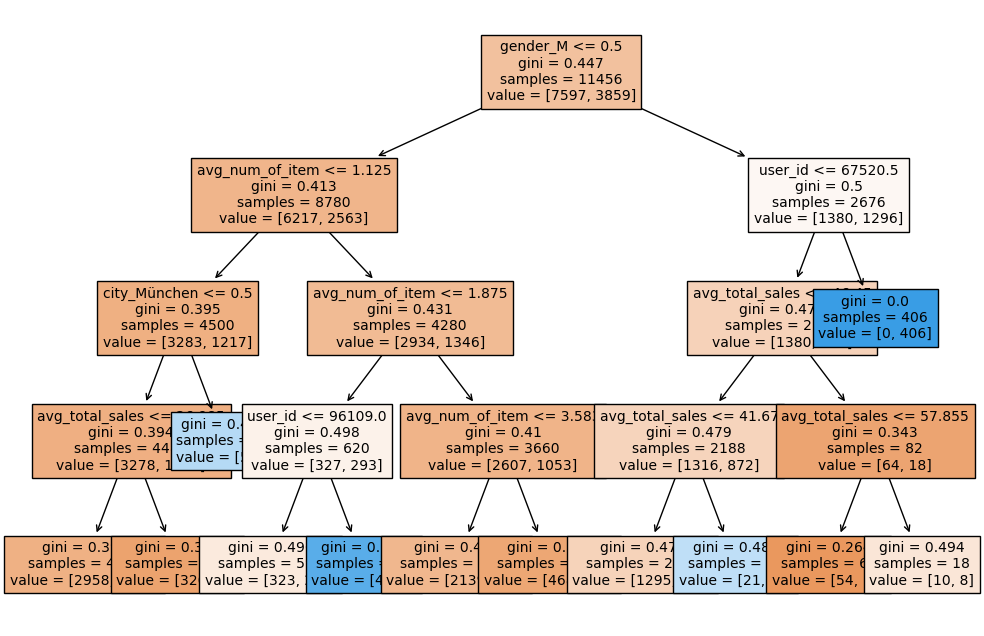

In [116]:
# Wykres drzewa

drzewo5 = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)
drzewo5.fit(X_train, y_train)

# Wizualizacja drzewa decyzyjnego
plt.figure(figsize=(12, 8))
plot_tree(drzewo5, filled=True, feature_names=feature_names, fontsize=10)
plt.show()